# Project Results

Hello! This notebook has code that loads the saved q-table and prints on the terminal. You can use this notebook to check the best trained agent's q-value here. Training process on cloud continues, so time to time I will commit better policy file if comes-up.

In [21]:
import numpy as np
import pickle

fr = open('policy', 'rb')
q_table = pickle.load(fr)
fr.close()        

_sign = lambda x: x and (1, -1)[x<0]

def toNumpy(usable_ace = False):
    d = np.zeros((22,12,2))
    for state,alist in q_table.items():
        if(state[0] > 21):
            continue
        if(state[1] > 11):
            continue
        if(state[2] != usable_ace):
            continue
        d[state[0]][state[1]][0] = alist[0]
        d[state[0]][state[1]][1] = alist[1]
    return d

def printQTable(d):
    print("---------------------------------------------------------------------------------------------------------------------------")
    print("  |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |     A     |")
    for i in range(1,22):
        print("%02d|"%i, end="")
        for j in range(2,12):
            if _sign(d[i][j][0]) == 1:
                print("\x1b[1;32;40m%05.2f\x1b[0m"%d[i][j][0],end="|")
            if _sign(d[i][j][0]) == -1:
                print("\x1b[1;31;40m%05.2f\x1b[0m"%abs(d[i][j][0]),end="|")
            if(d[i][j][0] == 0):
                print("\x1b[1;33;40m%05.2f\x1b[0m"%abs(d[i][j][0]),end="|")
            if _sign(d[i][j][1]) == 1:
                print("\x1b[6;32;47m%05.2f\x1b[0m"%d[i][j][1],end="|")
            if _sign(d[i][j][1]) == -1:
                print("\x1b[6;31;47m%05.2f\x1b[0m"%abs(d[i][j][1]),end="|")
            if(d[i][j][1] == 0):
                print("\x1b[6;33;47m%05.2f\x1b[0m"%abs(d[i][j][1]),end="|")

        print("")
    print("---------------------------------------------------------------------------------------------------------------------------")
    print("---------------------------------------------------------------------------------------------------------------------------")
    print("")

d = toNumpy(False)
print("No Usable Ace")
printQTable(d)
d = toNumpy(True)
print("Has Usable Ace")
printQTable(d)

No Usable Ace
---------------------------------------------------------------------------------------------------------------------------
  |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |     A     |
01|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|
02|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|
03|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|
04|00.01|02.82|00.01|03.49|00.02|04.32|00.01|03.68|00.01|04.05|00.01|04.82|00.01|04.43|00.01|05.36|00.01|03.16|00.03|02.18|
05|00.01|04.73|00.02|05.92|00.03|06.63|00.02|06.41|00.01|06.79|00.02|06.48|00.04|07.16|00.01|08.51|00.05|04.26|00.07|04.40|
06|00.02|06.59|00.02|06.35|00.04|08.20|00.04|07.79|00.03|08.08|00.02|07.64|00.03|08.64|00.03|09.14|00.07|06.68|00.08|0


### Same Results with Matplotlib

You can view the same results below. I hoping to show the result with better graphics using matplotlib library.

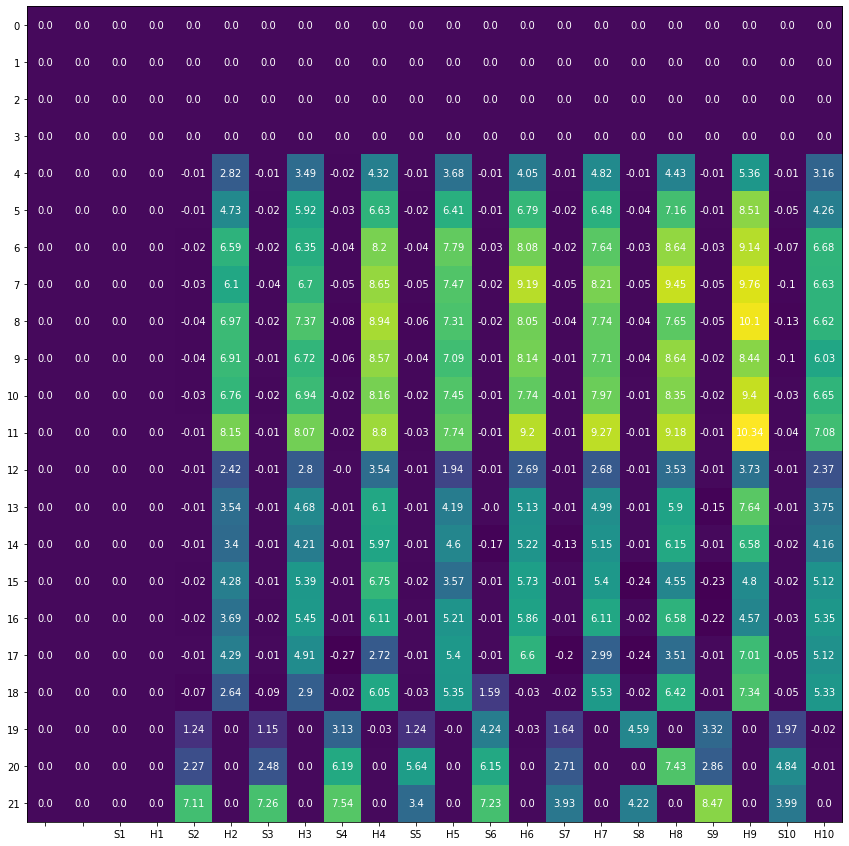

In [9]:
import numpy as np
import pickle

fr = open('policy', 'rb')
q_table = pickle.load(fr)
fr.close()        

d1 = np.zeros((22,11))
d2 = np.zeros((22,11))
d3 = np.zeros((22,22))
for state,alist in q_table.items():
    if(state[0] > 21 or state[1] > 10):
        continue
    d1[state[0]][state[1]] = alist[0]
    d2[state[0]][state[1]] = alist[1]
    d3[state[0]][state[1]*2] = alist[0]
    d3[state[0]][state[1]*2+1] = alist[1]

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(30,15))
im1 = ax1.imshow(d3)

# We want to show all ticks...
ax1.set_xticks(np.arange(22))######
ax1.set_yticks(np.arange(22))

ax1.set_xticklabels(["","","S1","H1","S2","H2","S3","H3","S4","H4","S5","H5","S6","H6","S7","H7","S8","H8","S9","H9","S10","H10"])

for i in range(len(d3)):
    for j in range(len(d3[i])):
        text = ax1.text(j, i, round(d3[i, j],2),
                       ha="center", va="center", color="w")

plt.show()